In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'iris.csv'
iris_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# Extracting the features for clustering
features = iris_data.drop('variety', axis=1)

In [4]:
# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [5]:
# Determining the optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [6]:
# Applying K-Means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adding the cluster labels to the original dataframe
iris_data['Cluster'] = clusters

c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
# Applying Agglomerative Clustering with 3 clusters
agglo_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agglo_clusters = agglo_cluster.fit_predict(scaled_features)

# Adding the agglomerative cluster labels to the original dataframe
iris_data['AggloCluster'] = agglo_clusters

c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [8]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_features)

# Adding the DBSCAN cluster labels to the original dataframe
iris_data['DBSCANCluster'] = dbscan_clusters

In [9]:
# Ground truth labels
true_labels = iris_data['variety']

# Labels from each clustering algorithm
kmeans_labels = iris_data['Cluster']
agglo_labels = iris_data['AggloCluster']
dbscan_labels = iris_data['DBSCANCluster']

# Calculating metrics for K-Means
ari_kmeans = adjusted_rand_score(true_labels, kmeans_labels)
nmi_kmeans = normalized_mutual_info_score(true_labels, kmeans_labels)
silhouette_kmeans = silhouette_score(scaled_features, kmeans_labels)

# Calculating metrics for Agglomerative Clustering
ari_agglo = adjusted_rand_score(true_labels, agglo_labels)
nmi_agglo = normalized_mutual_info_score(true_labels, agglo_labels)
silhouette_agglo = silhouette_score(scaled_features, agglo_labels)

# Calculating metrics for DBSCAN
ari_dbscan = adjusted_rand_score(true_labels, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(true_labels, dbscan_labels)
silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels) if len(set(dbscan_labels)) > 1 else float('nan')  # Silhouette score is not meaningful for a single cluster

# Compile the results into a DataFrame for easier comparison
evaluation_results = pd.DataFrame({
    'ARI': [ari_kmeans, ari_agglo, ari_dbscan],
    'NMI': [nmi_kmeans, nmi_agglo, nmi_dbscan],
    'Silhouette': [silhouette_kmeans, silhouette_agglo, silhouette_dbscan]
}, index=['K-Means', 'Agglomerative', 'DBSCAN'])

evaluation_results

,ARI,NMI,Silhouette
K-Means,0.620135,0.659487,0.459948
Agglomerative,0.615323,0.675470,0.446689
DBSCAN,0.442099,0.511430,0.356516


c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

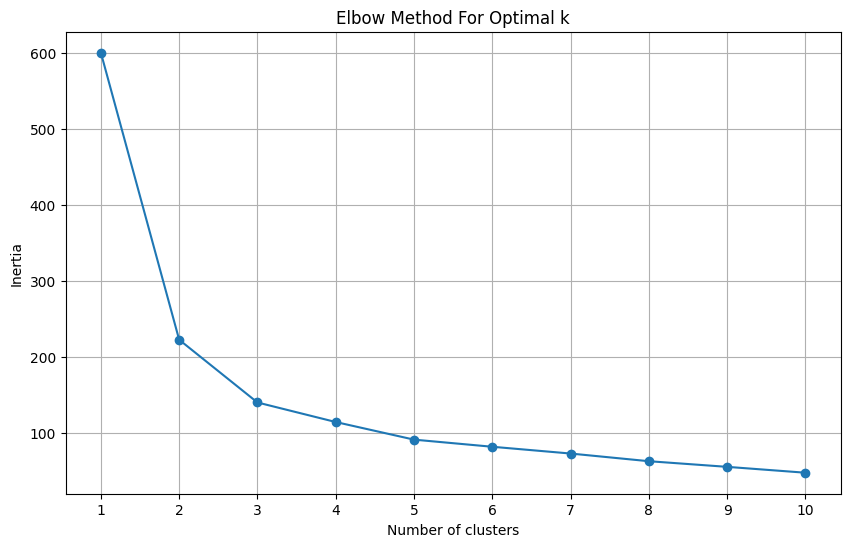

In [6]:

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


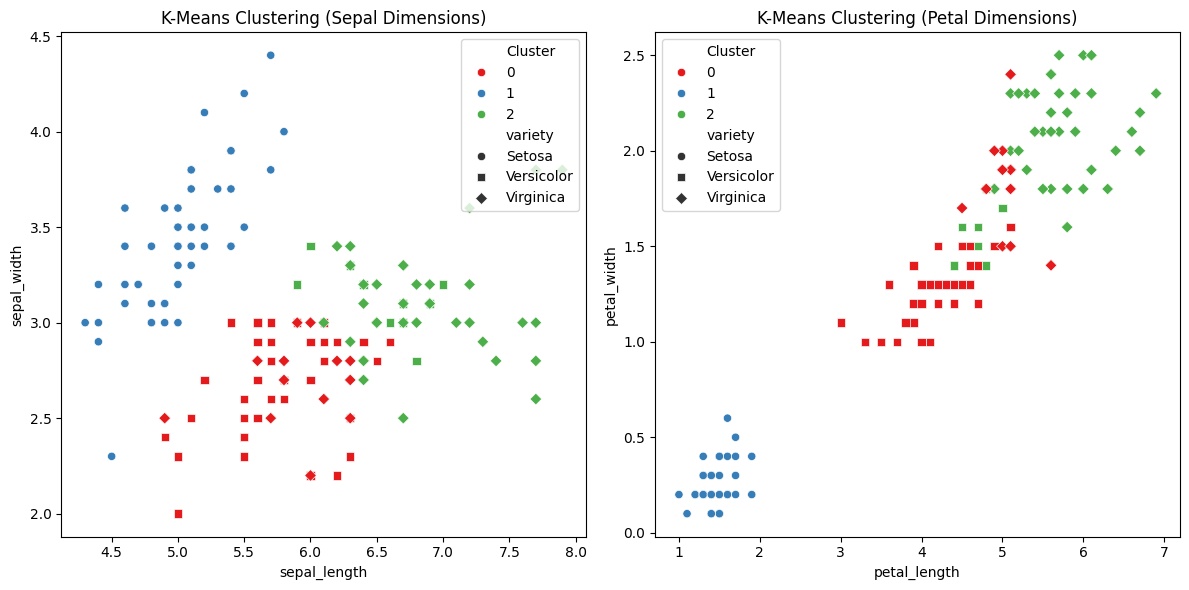

In [7]:
# Visualizing the clusters
plt.figure(figsize=(12, 6))

# Plotting the clusters for the first two features (sepal length and sepal width)
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', data=iris_data, palette='Set1', style='variety', markers=['o', 's', 'D'])
plt.title('K-Means Clustering (Sepal Dimensions)')

# Plotting the clusters for the last two features (petal length and petal width)
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='Cluster', data=iris_data, palette='Set1', style='variety', markers=['o', 's', 'D'])
plt.title('K-Means Clustering (Petal Dimensions)')

plt.tight_layout()
plt.show()

c:\Users\robyr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


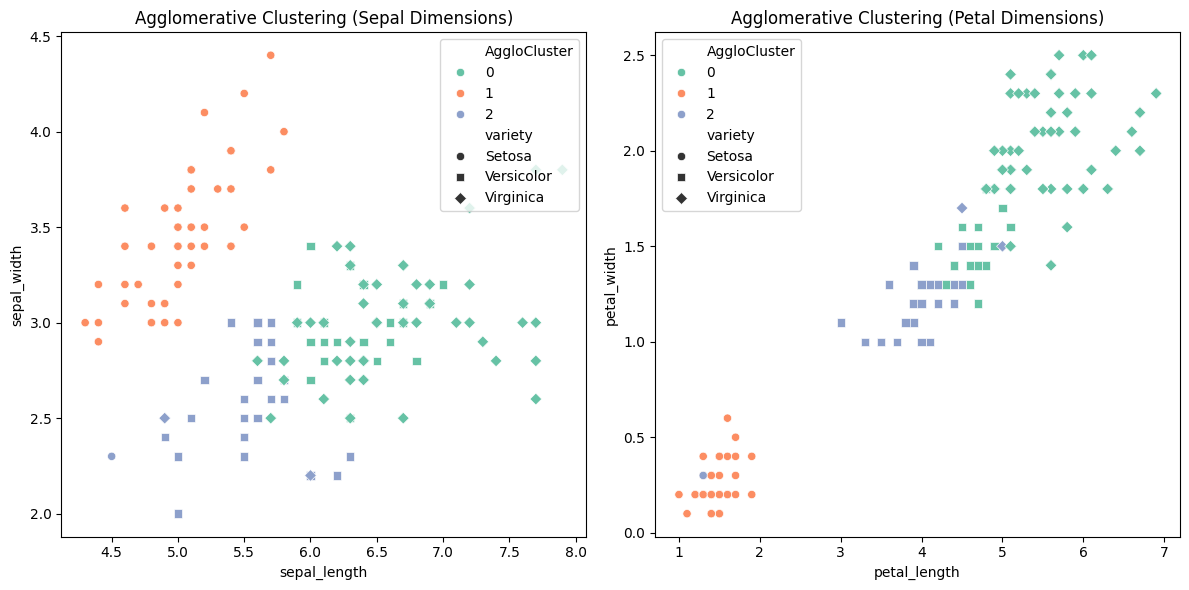

In [14]:
# Visualizing the clusters
plt.figure(figsize=(12, 6))

# Plotting the clusters for the first two features (sepal length and sepal width)
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='AggloCluster', data=iris_data, palette='Set2', style='variety', markers=['o', 's', 'D'])
plt.title('Agglomerative Clustering (Sepal Dimensions)')

# Plotting the clusters for the last two features (petal length and petal width)
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='AggloCluster', data=iris_data, palette='Set2', style='variety', markers=['o', 's', 'D'])
plt.title('Agglomerative Clustering (Petal Dimensions)')

plt.tight_layout()
plt.show()

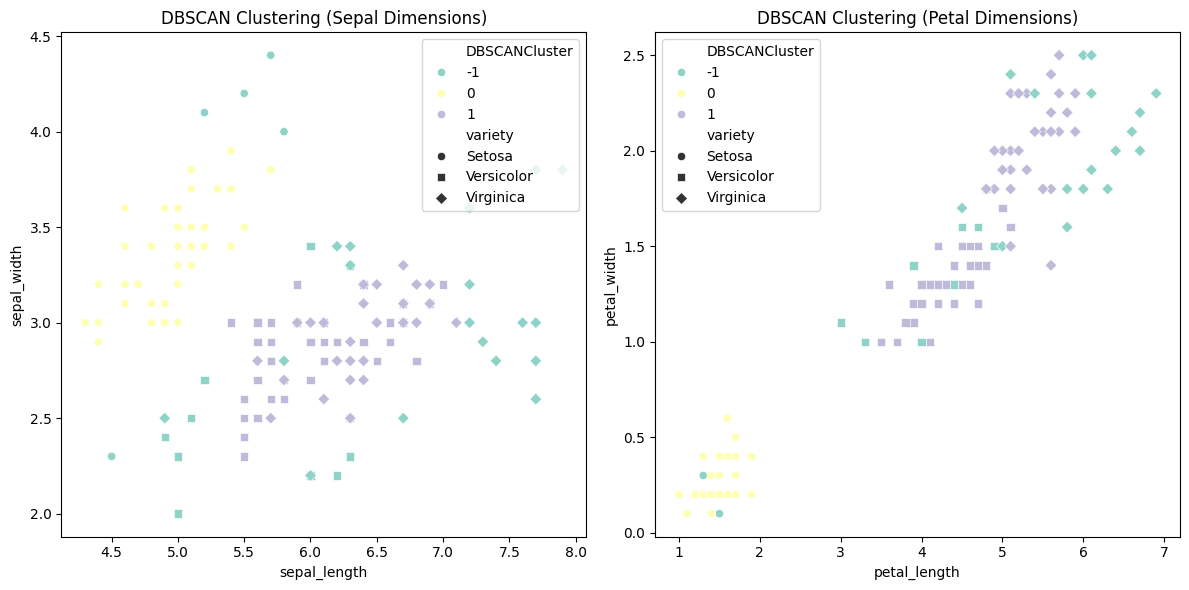

In [13]:
# Visualizing the clusters
plt.figure(figsize=(12, 6))

# Plotting the clusters for the first two features (sepal length and sepal width)
plt.subplot(1, 2, 1)
sns.scatterplot(x='sepal_length', y='sepal_width', hue='DBSCANCluster', data=iris_data, palette='Set3', style='variety', markers=['o', 's', 'D'])
plt.title('DBSCAN Clustering (Sepal Dimensions)')

# Plotting the clusters for the last two features (petal length and petal width)
plt.subplot(1, 2, 2)
sns.scatterplot(x='petal_length', y='petal_width', hue='DBSCANCluster', data=iris_data, palette='Set3', style='variety', markers=['o', 's', 'D'])
plt.title('DBSCAN Clustering (Petal Dimensions)')

plt.tight_layout()
plt.show()

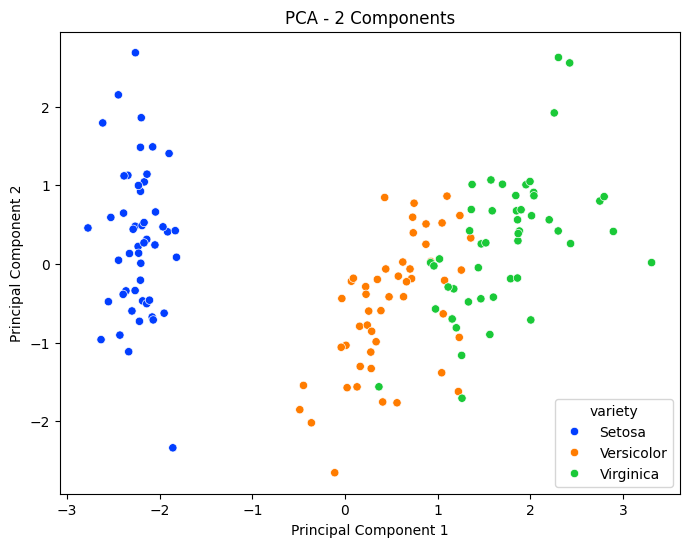

In [16]:
# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Creating a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['variety'] = iris_data['variety']

# Visualizing the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='variety', data=pca_df, palette='bright')
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()